# **Normalisation and Transformation**
 **Dataset used:Wholesale customers data**

In [31]:
#Importing required libraries

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [32]:
#Loading the dataset - Wholesale customers data
custdf = pd.read_csv("Wholesale customers data.csv")
custdf.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [33]:
print("Number of columns:",len(custdf.columns))
print("Number of rows:",len(custdf))
print("Shape of the Customer dataframe:",custdf.shape)

Number of columns: 8
Number of rows: 440
Shape of the Customer dataframe: (440, 8)


In [34]:
#Number of missing values

custdf.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


**The customer data has no missing values in any of its features**.

So, no modification is required in the customer dataframe(Data Imputation or any other operation)

In [35]:
#Handling outliers

from scipy import stats
z_scores = np.abs(stats.zscore(custdf))
z_scores

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,0.041115,0.589367,0.043569,0.066339
1,1.448652,0.590668,0.391302,0.544458,0.170318,0.270136,0.086407,0.089151
2,1.448652,0.590668,0.447029,0.408538,0.028157,0.137536,0.133232,2.243293
3,0.690297,0.590668,0.100111,0.624020,0.392977,0.687144,0.498588,0.093411
4,1.448652,0.590668,0.840239,0.052396,0.079356,0.173859,0.231918,1.299347
...,...,...,...,...,...,...,...,...
435,0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,0.566831,0.241091
436,0.690297,0.590668,2.155293,0.592142,0.757165,0.296561,0.585519,0.291501
437,1.448652,0.590668,0.200326,1.314671,2.348386,0.543380,2.511218,0.121456
438,0.690297,0.590668,0.135384,0.517536,0.602514,0.419441,0.569770,0.213046


In [36]:
#Initial shape of the dataframe

custdf.shape

(440, 8)

In [37]:
custdf = custdf[(z_scores<3).all(axis=1)]

#After dropping the outliers

custdf.shape

(414, 8)

**26 rows have contained outliers** and have been dropped by their z-score and the dataframe is modified.

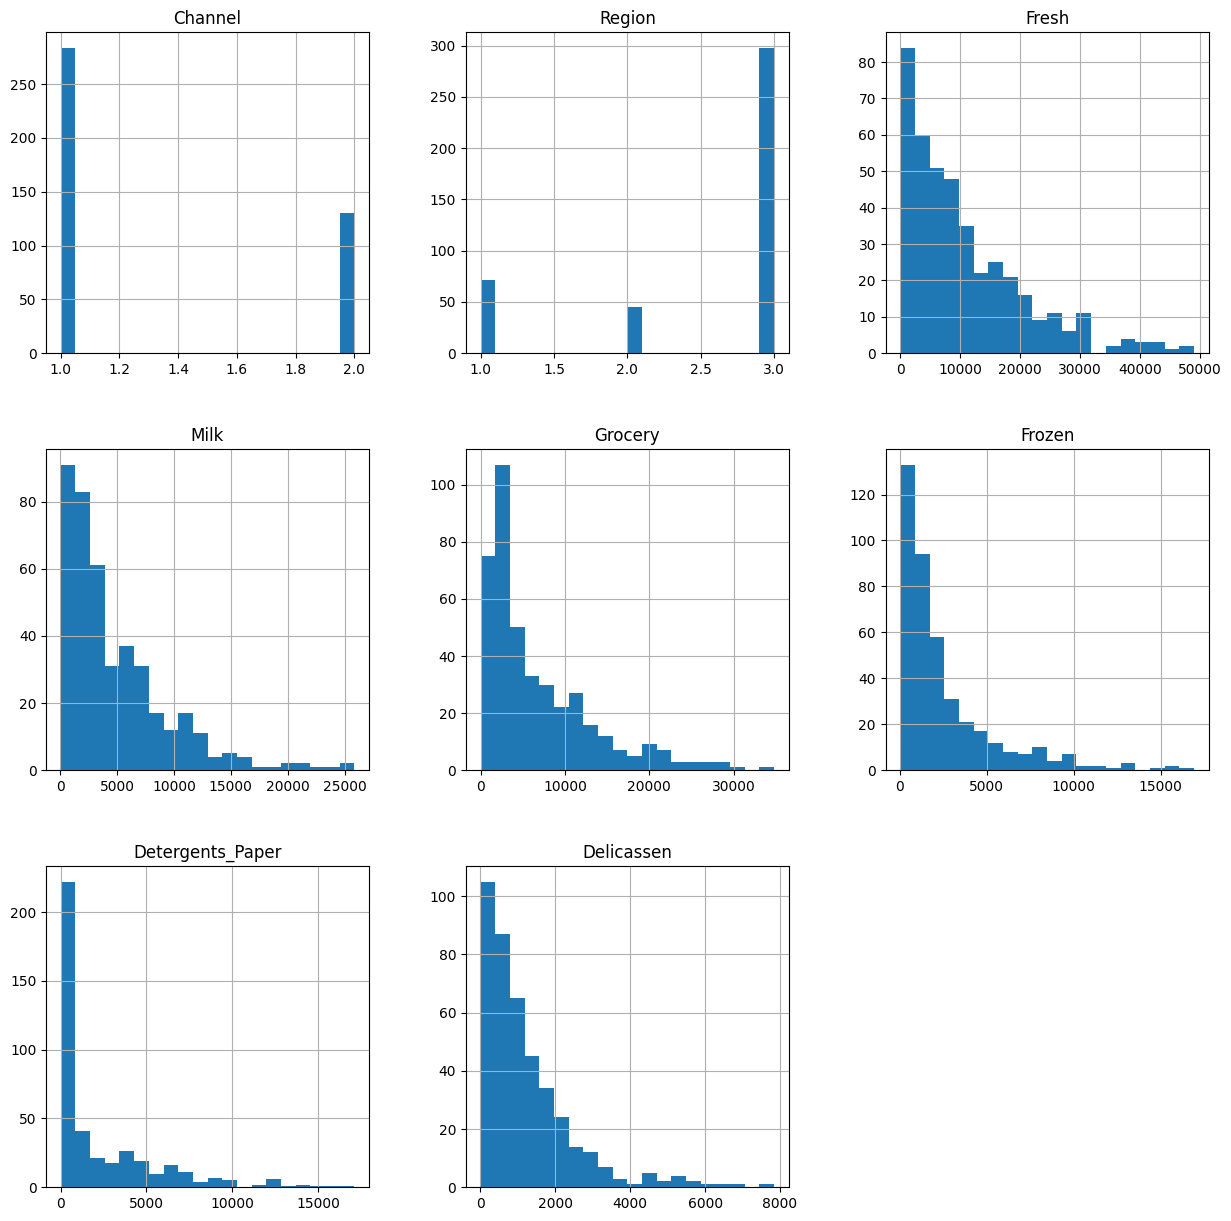

In [38]:
custdf.hist(bins=20, figsize=(15,15))
plt.show()

**The dataset is not normalized and that can be inferred from the histogram plots**.

So, the dataset is not normalized.

In [39]:
#Normalizing the dataset

# 1) Min-Max Normalization
def min_max_normalize(data):
    return (data - data.min()) / (data.max() - data.min())

# Apply normalization to each column
custdf_normalized_1 = custdf.apply(min_max_normalize)

print("Min-Max Normalized Data:\n")
custdf_normalized_1

Min-Max Normalized Data:



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.0,1.0,0.258174,0.372031,0.217253,0.011187,0.156044,0.170259
1,1.0,1.0,0.143783,0.377998,0.274943,0.102818,0.192207,0.226119
2,1.0,1.0,0.129433,0.339172,0.220788,0.140878,0.205235,1.000000
3,0.0,1.0,0.270322,0.044213,0.121245,0.377590,0.029444,0.227650
4,1.0,1.0,0.460905,0.207502,0.206818,0.230259,0.103640,0.660885
...,...,...,...,...,...,...,...,...
435,0.0,1.0,0.605381,0.464835,0.460605,0.776015,0.010457,0.280704
436,0.0,1.0,0.799531,0.053319,0.021875,0.265479,0.005258,0.298814
437,1.0,1.0,0.296127,0.598016,0.869240,0.024387,0.866858,0.237725
438,0.0,1.0,0.209682,0.074631,0.064072,0.059962,0.009640,0.270629


In [40]:
# 2) Z-score Normalization
def zscore_normalize(data):
    return (data - data.mean()) / data.std()

# Apply normalization to each column
custdf_normalized_2 = custdf.apply(zscore_normalize)

print("Z-score Normalized Data:\n")
custdf_normalized_2

Z-score Normalized Data:



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.476258,0.587012,0.199328,1.050138,0.115697,-0.800875,0.093685,0.082192
1,1.476258,0.587012,-0.372205,1.083943,0.426563,-0.270135,0.286597,0.441975
2,1.476258,0.587012,-0.443901,0.863997,0.134748,-0.049679,0.356095,5.426372
3,-0.675752,0.587012,0.260025,-0.806890,-0.401639,1.321399,-0.581665,0.451832
4,1.476258,0.587012,1.212239,0.118112,0.059471,0.468032,-0.185867,3.242207
...,...,...,...,...,...,...,...,...
435,-0.675752,0.587012,1.934089,1.575857,1.427002,3.629157,-0.682952,0.793544
436,-0.675752,0.587012,2.904126,-0.755306,-0.937096,0.672031,-0.710689,0.910187
437,1.476258,0.587012,0.388956,2.330303,3.628930,-0.724418,3.885554,0.516725
438,-0.675752,0.587012,-0.042952,-0.634577,-0.709716,-0.518362,-0.687315,0.728652


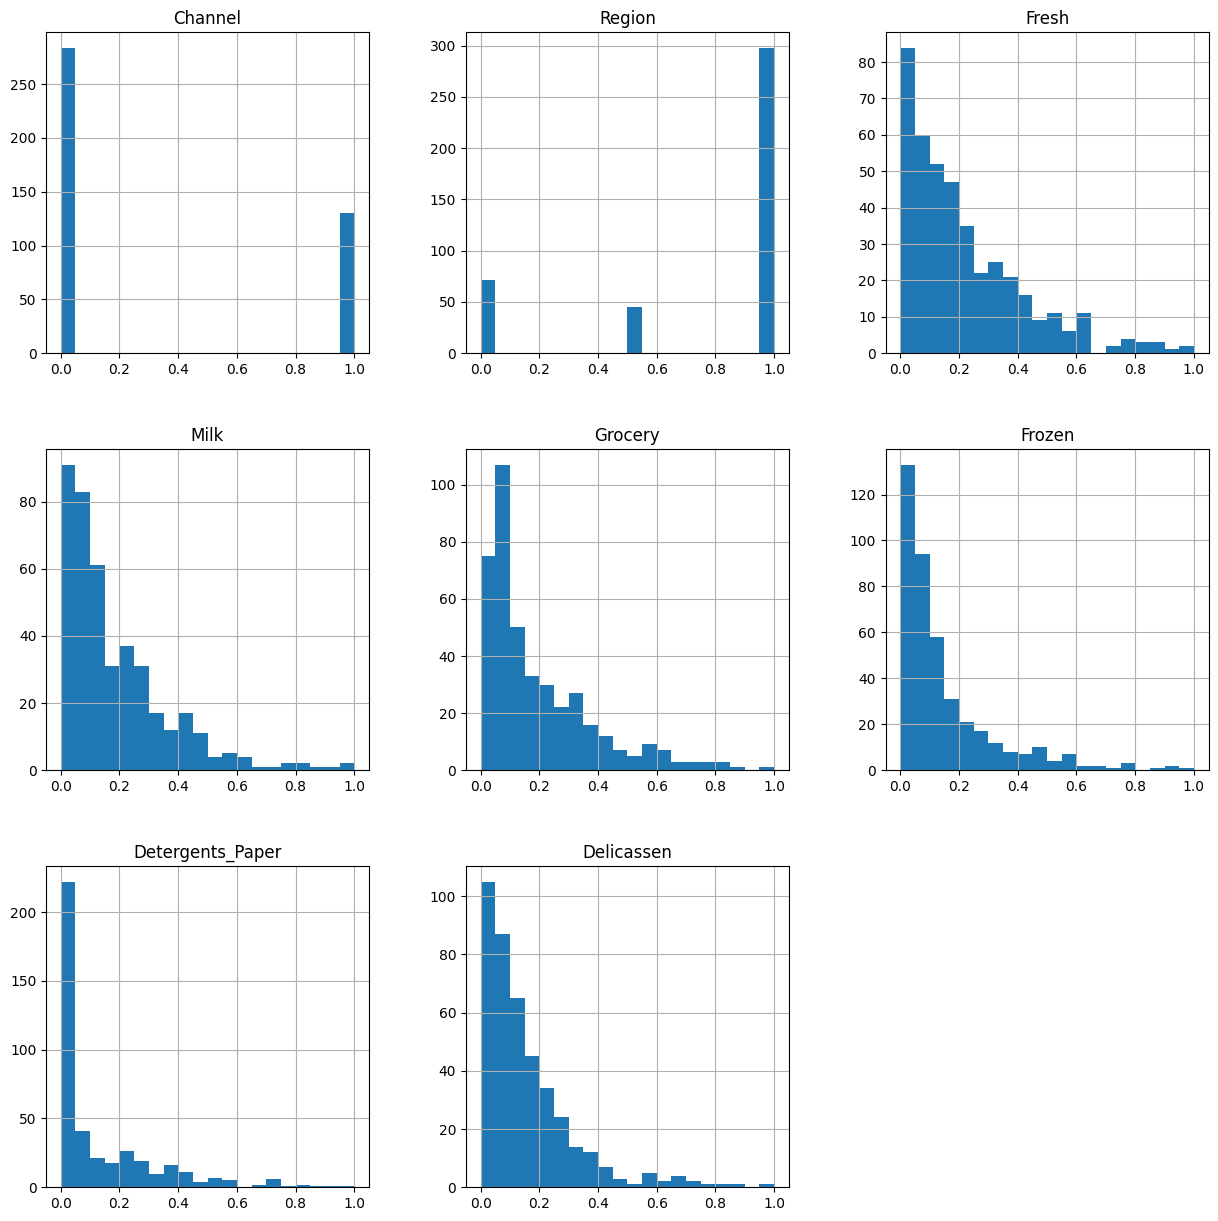

In [41]:
#Histogram of the Min Max normalized dataframe

custdf_normalized_1.hist(bins=20, figsize=(15,15))
plt.show()

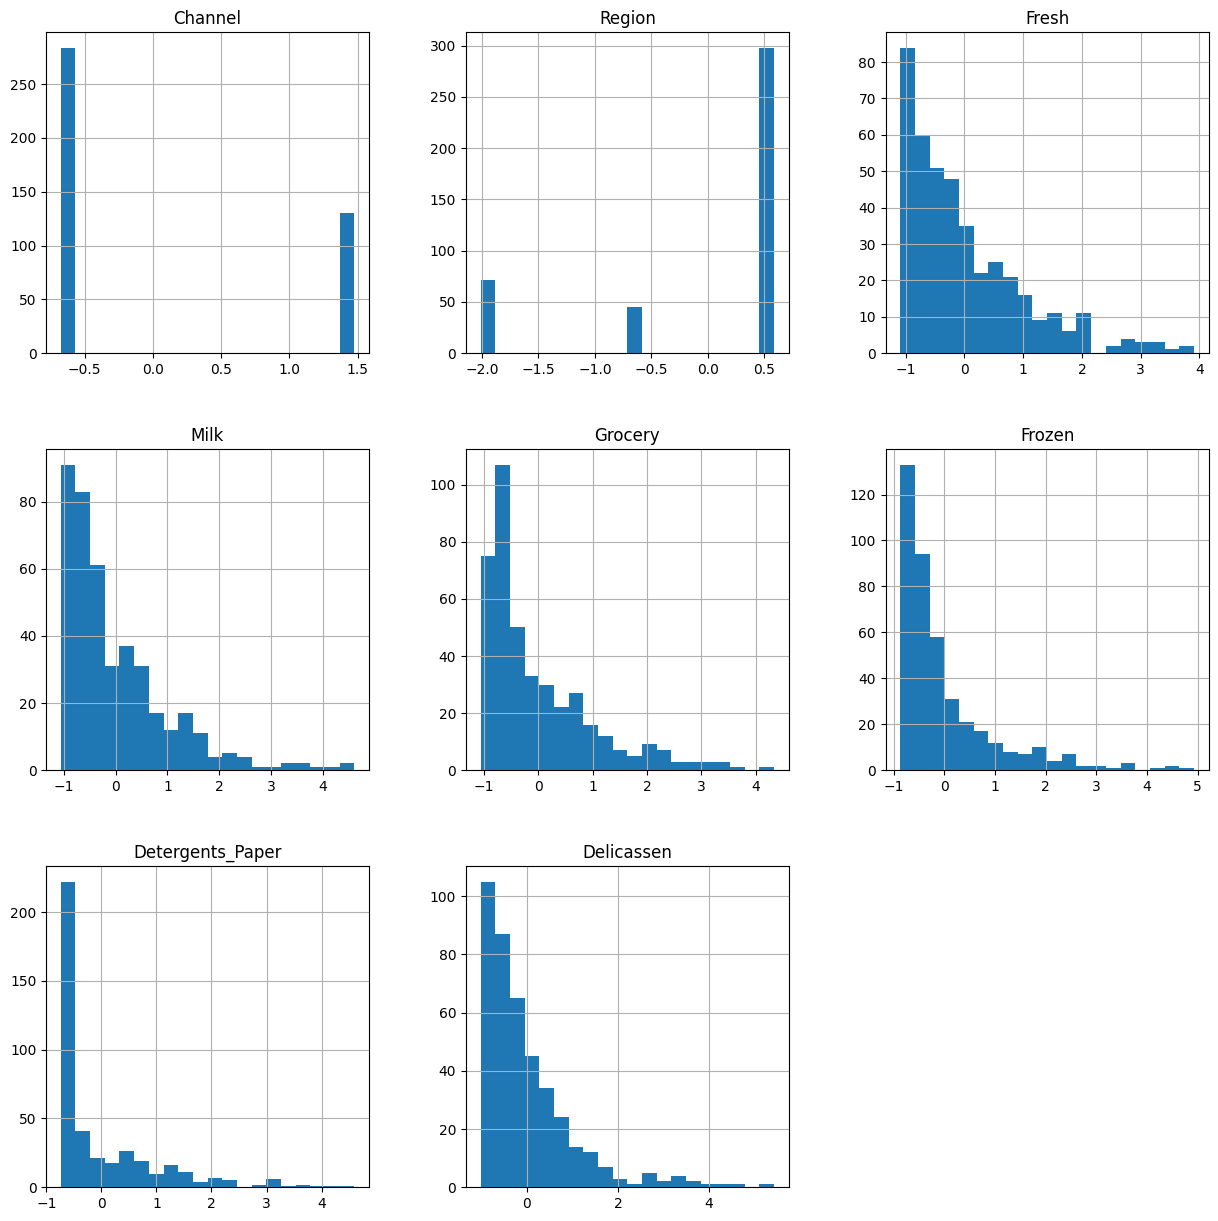

In [42]:
#Histogram of z-score normalization

custdf_normalized_2.hist(bins=20, figsize=(15,15))
plt.show()

**The data is compressed to the range of [0,1]**.

Thus the whole dataframe is normalized.

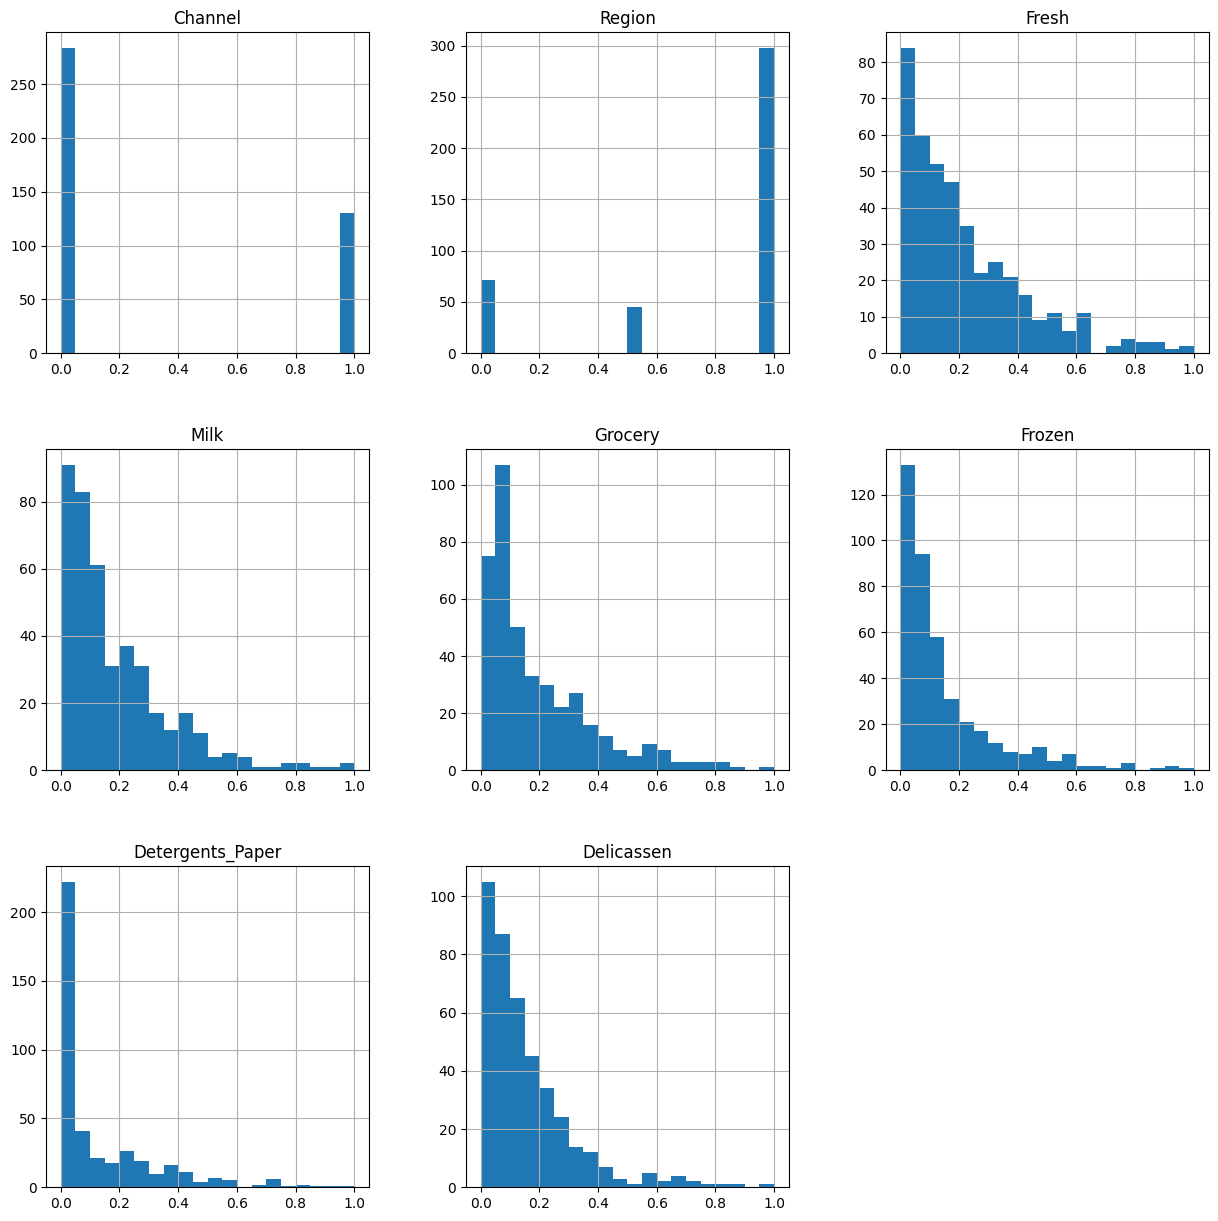

In [43]:
#Histogram for the normalized dataset

custdf_normalized_1.hist(bins=20,figsize=(15,15))
plt.show()

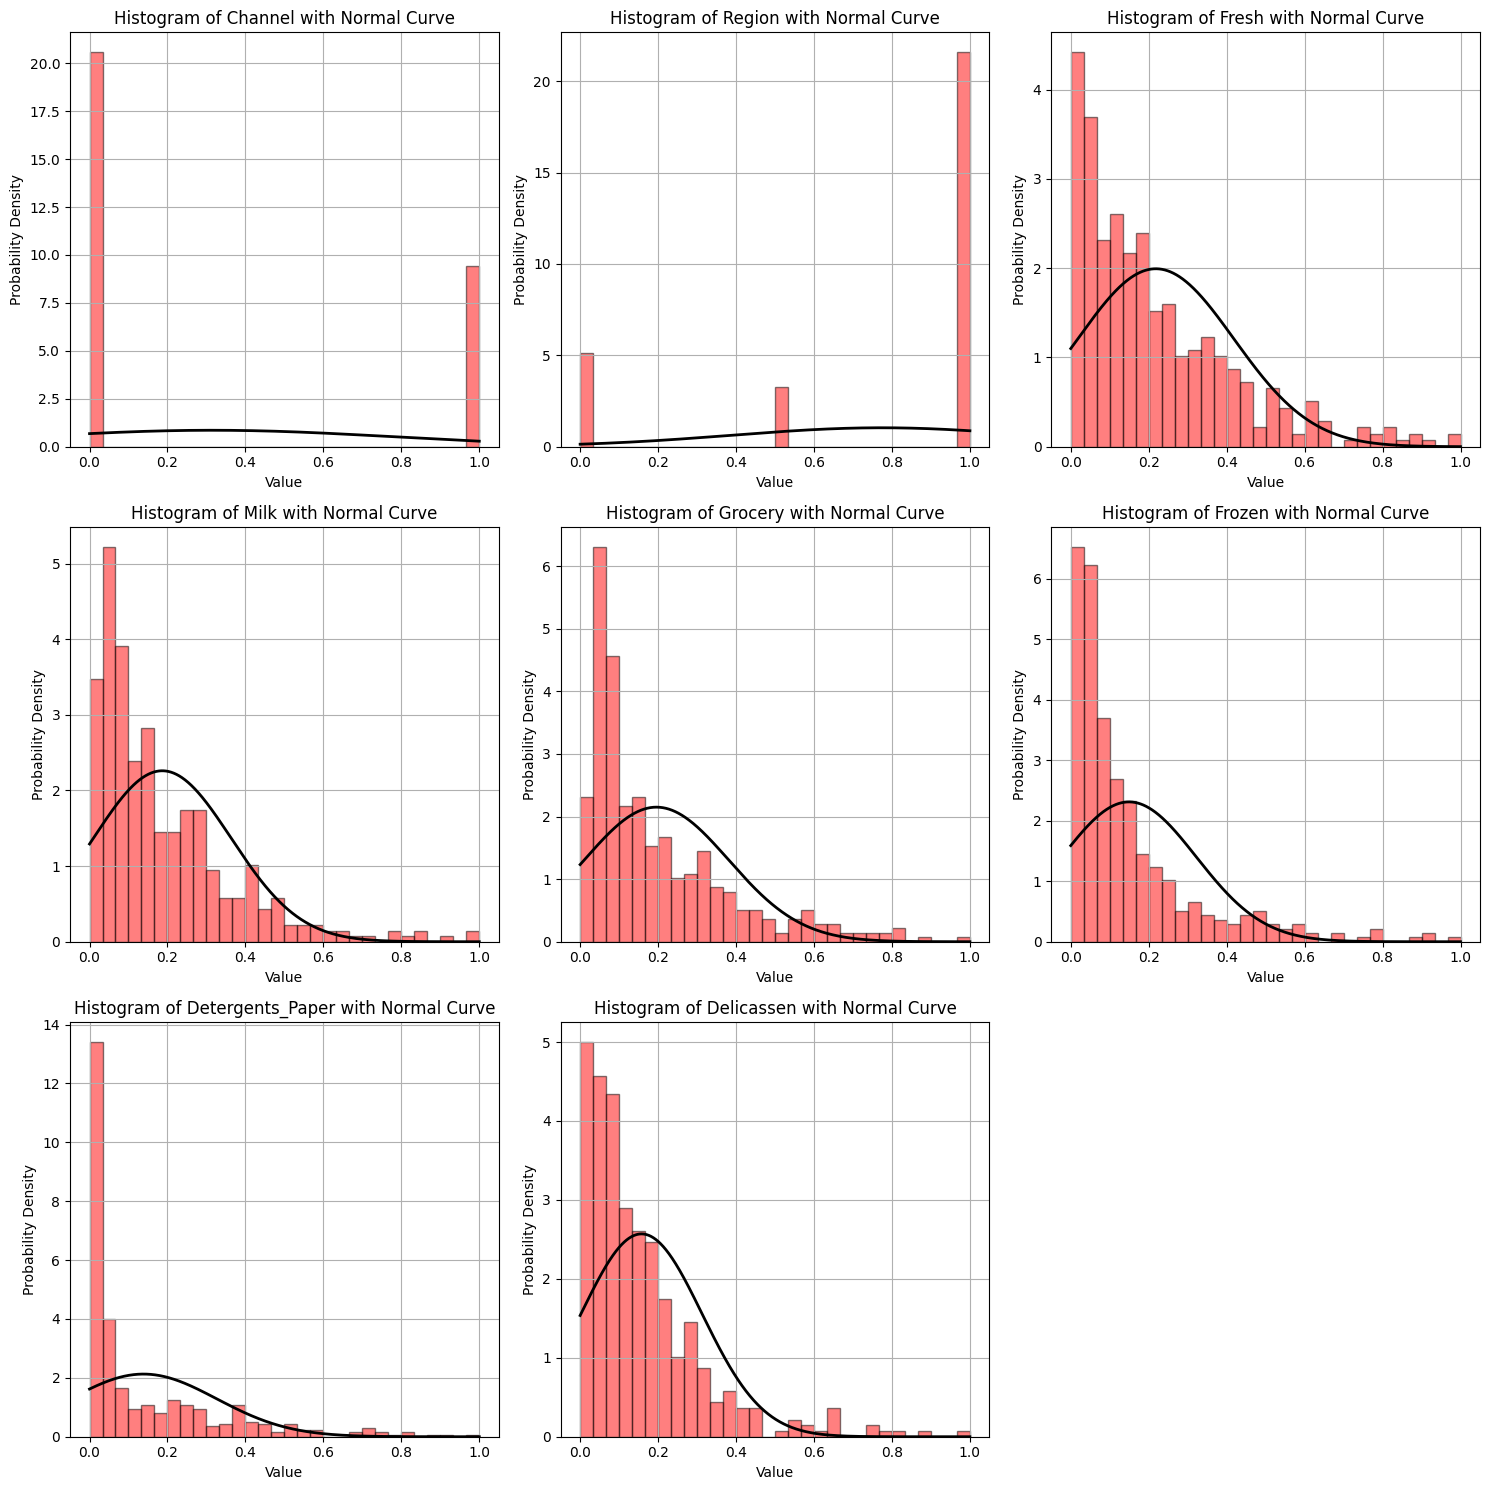

In [44]:
numeric_features = custdf_normalized_1.columns #Full of numeric features
num_features = len(numeric_features)
cols = 3
rows = (num_features // cols) + (num_features % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    data = custdf_normalized_1[feature].dropna()

    axes[i].hist(data, bins=30, density=True,
                 alpha=0.5, color='r', edgecolor='black')

    mu, sigma = data.mean(), data.std()

    x = np.linspace(data.min(), data.max(), 1000)
    pdf = sc.stats.norm.pdf(x, mu, sigma)

    axes[i].plot(x, pdf, 'k', linewidth=2)

    axes[i].set_title(f'Histogram of {feature} with Normal Curve')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Probability Density')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

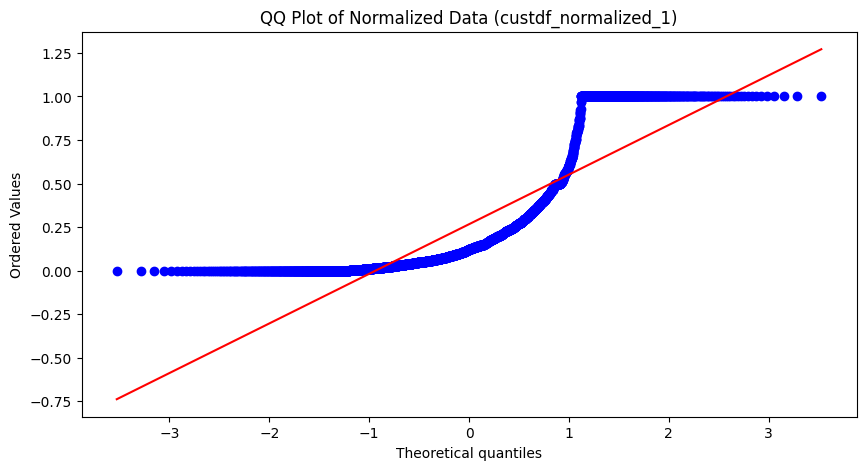

In [45]:
#QQ plot for the normalized dataset

import matplotlib.pyplot as plt
import scipy.stats as stats

custdf_normalized_flat = custdf_normalized_1.to_numpy().flatten()

plt.figure(figsize=(10, 5))
stats.probplot(custdf_normalized_flat, dist="norm", plot=plt)
plt.title('QQ Plot of Normalized Data (custdf_normalized_1)')
plt.show()

**The dataset's distribution is not normal**, and is inferred from the QQ plot and histogram plot as well

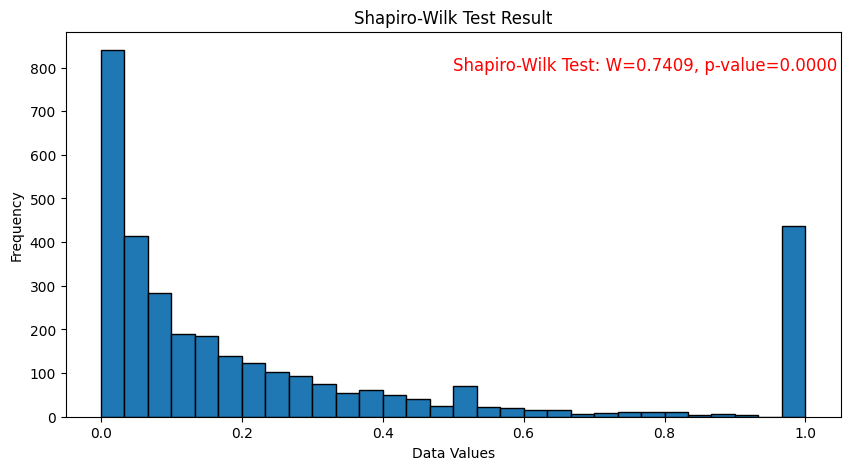

In [49]:
from scipy.stats import shapiro,kstest
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
shapiro_test = shapiro(custdf_normalized_1)

# Plot the histogram with annotation
plt.figure(figsize=(10, 5))
plt.hist(custdf_normalized_flat, bins=30, edgecolor='black')
plt.title('Shapiro-Wilk Test Result')
plt.xlabel('Data Values')
plt.ylabel('Frequency')

p_value_text = f'Shapiro-Wilk Test: '
p_value_text += f'W={shapiro_test[0]:.4f}, p-value={shapiro_test[1]:.4f}'
plt.annotate(p_value_text, xy=(0.5, 0.9),
             xycoords='axes fraction', fontsize=12, color='red')

plt.show()

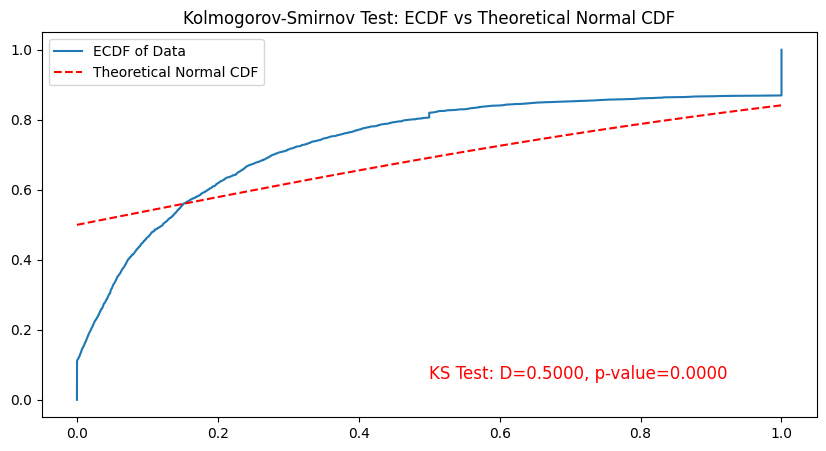

In [51]:
from scipy.stats import kstest, norm
from statsmodels.distributions.empirical_distribution import ECDF

# Perform Kolmogorov-Smirnov test
ks_test = kstest(custdf_normalized_flat, 'norm')

# Generate theoretical normal distribution CDF
x = np.linspace(np.min(custdf_normalized_flat),
                np.max(custdf_normalized_flat), 100)
cdf_theoretical = norm.cdf(x)

ecdf = ECDF(custdf_normalized_flat)
plt.figure(figsize=(10, 5))
plt.plot(ecdf.x, ecdf.y, label='ECDF of Data')
plt.plot(x, cdf_theoretical, label='Theoretical Normal CDF',
         linestyle='--', color='red')
plt.title('Kolmogorov-Smirnov Test: ECDF vs Theoretical Normal CDF')

ks_text = f'KS Test: D={ks_test[0]:.4f}, '
ks_text += f'p-value={ks_test[1]:.4f}'
plt.annotate(ks_text, xy=(0.5, 0.1),
             xycoords='axes fraction', fontsize=12, color='red')

plt.legend()
plt.show()

In Shapiro Wilk test, **the test statistic value W is not that close to 1.** So, it is moderately follows normal distribution.

In KS test, **p-value is less than 0.05, and the data doesn't follow normal distribution**, and needs to be transformed.

In [67]:
#Applying transformations

# Apply Logarithmic transformation (only for strictly positive data)
cust_log = np.log1p(custdf_normalized_1)

# Box-Cox transformation (must ensure all data is positive)
cust_bc, _ = stats.boxcox(custdf_normalized_flat + 1e-6)
# Adding a small constant to handle non-positive values

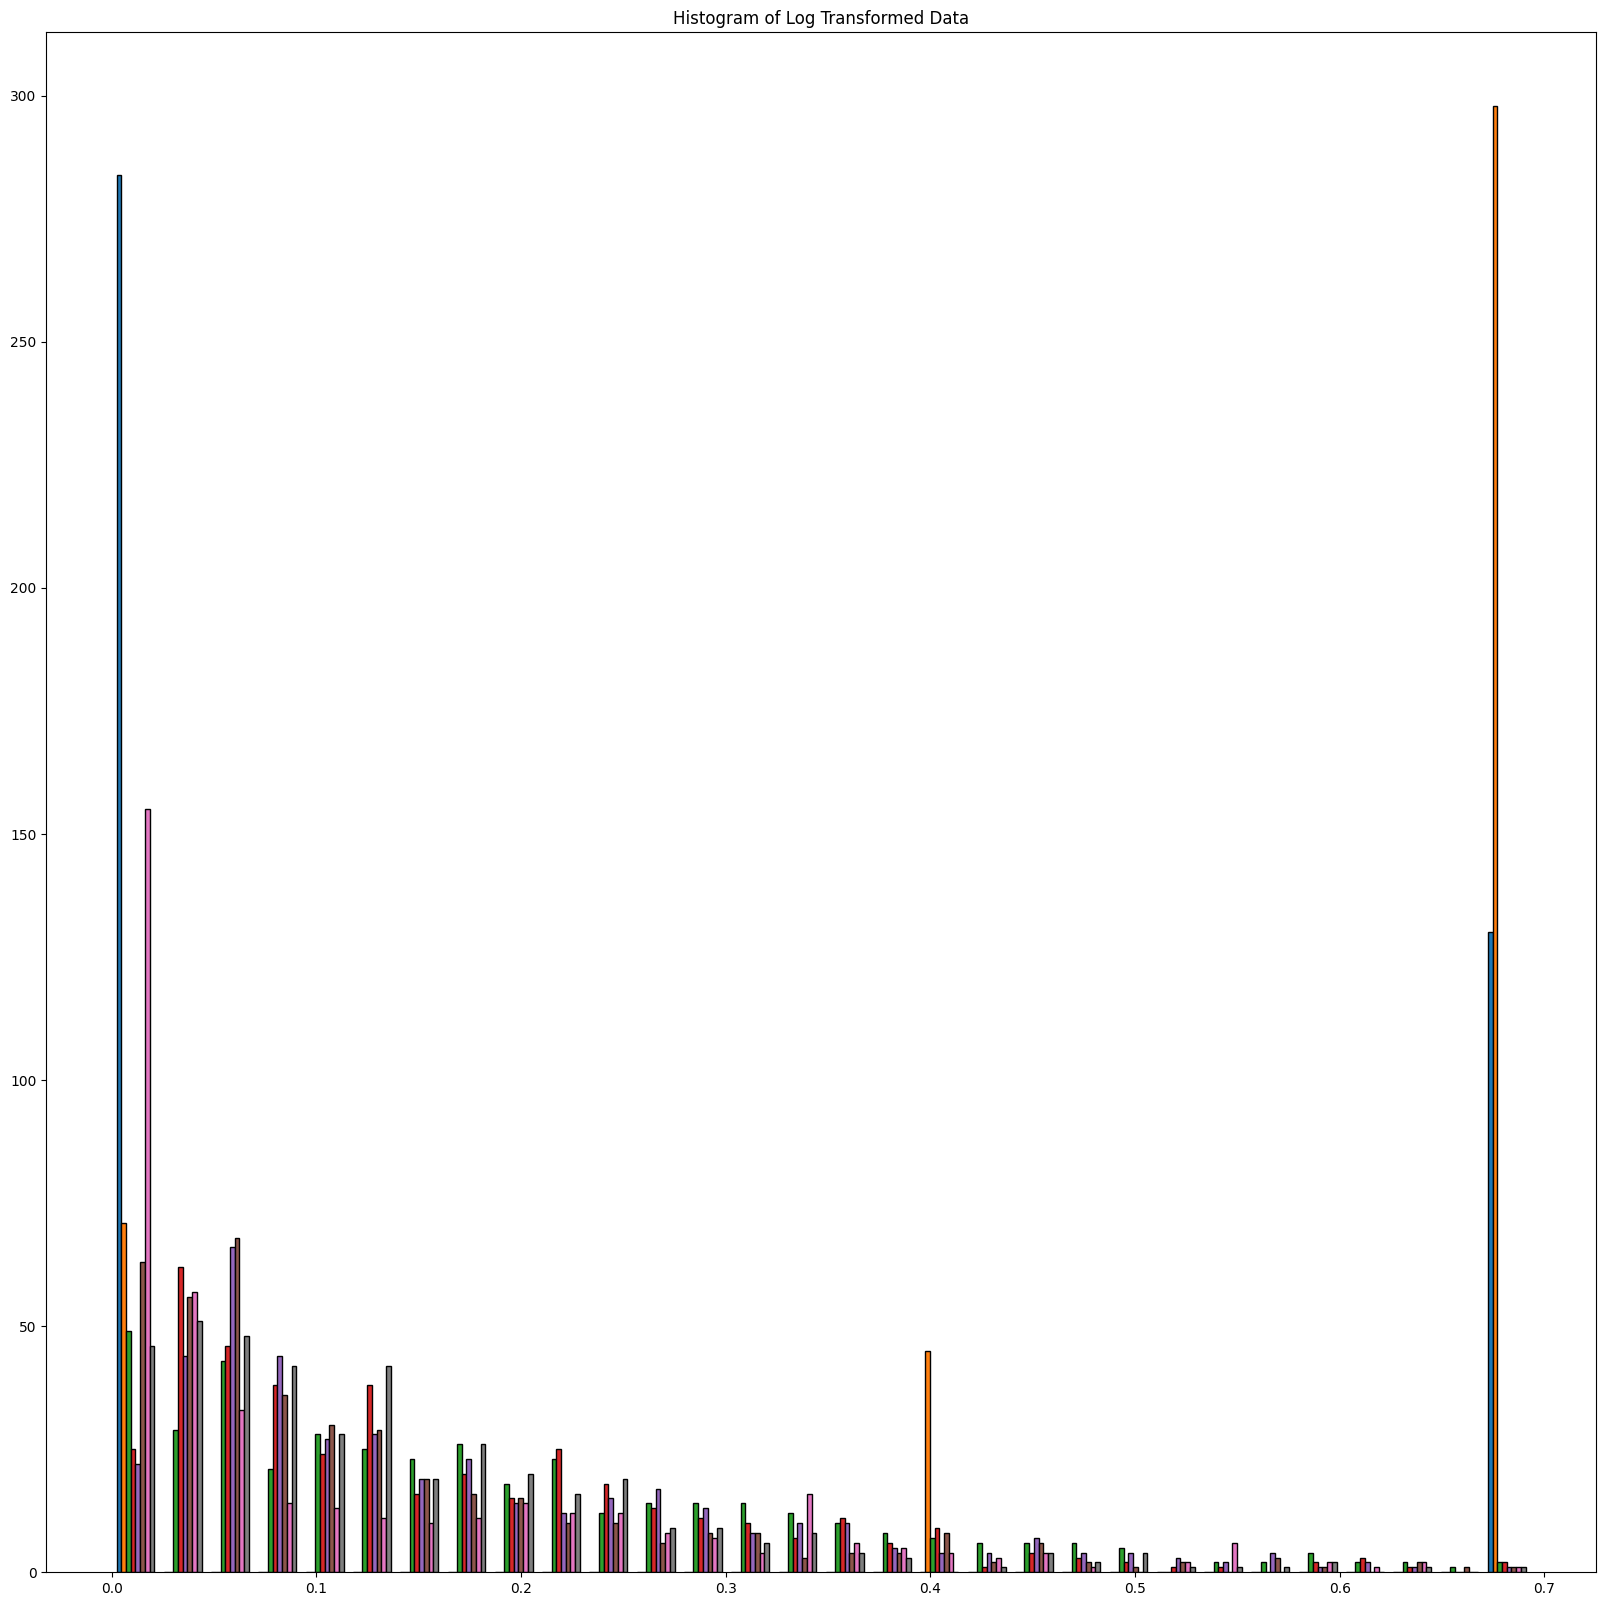

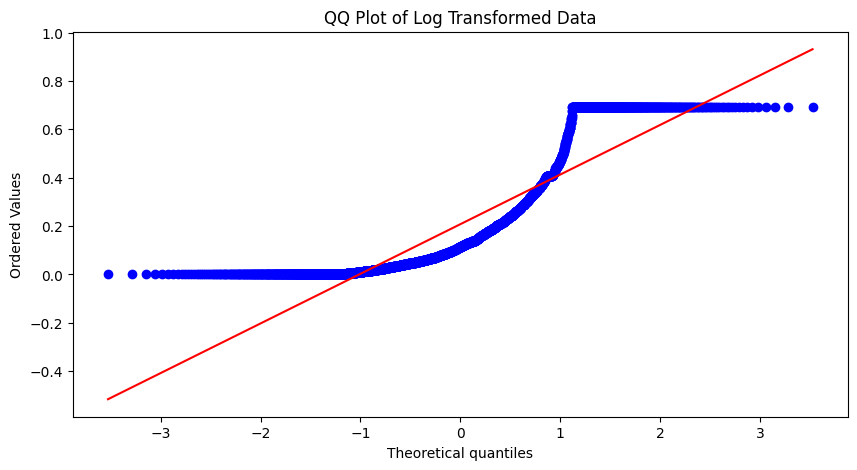


Shapiro-Wilk Test after Log Transformation:
W=0.7931807406197606, p-value=5.141749059270015e-54

Kolmogorov-Smirnov Test after Log Transformation:
KS Statistic=[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5], p-value=[3.12724289e-96 3.12724289e-96 3.12724289e-96 3.12724289e-96
 3.12724289e-96 3.12724289e-96 3.12724289e-96 3.12724289e-96]


In [66]:
#Reassessment after applying transformations

# Histogram and QQ plot for log-transformed data
plt.figure(figsize=(20, 20))
plt.hist(cust_log, bins=30, edgecolor='black')
plt.title('Histogram of Log Transformed Data')
plt.show()
print()

cust_log_flatten = cust_log.values.flatten()
plt.figure(figsize=(10,5))
stats.probplot(cust_log_flatten, dist="norm", plot=plt)
plt.title('QQ Plot of Log Transformed Data')
plt.show()
print()

# Shapiro-Wilk test for log-transformed data
shapiro_log_test = shapiro(cust_log)
print(f'Shapiro-Wilk Test after Log Transformation:')
print(f'W={shapiro_log_test[0]}, p-value={shapiro_log_test[1]}')
print()

# Kolmogorov-Smirnov test for log-transformed data
ks_log_test = kstest(cust_log, 'norm')
print(f'Kolmogorov-Smirnov Test after Log Transformation:')
print(f'KS Statistic={ks_log_test[0]}, p-value={ks_log_test[1]}')

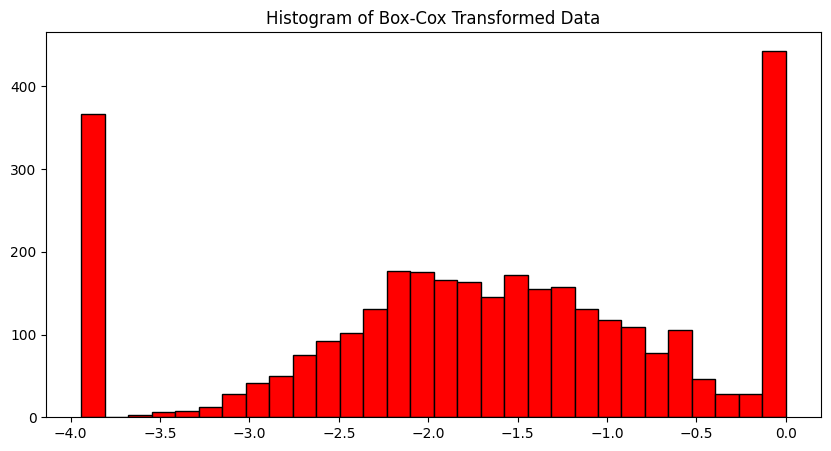

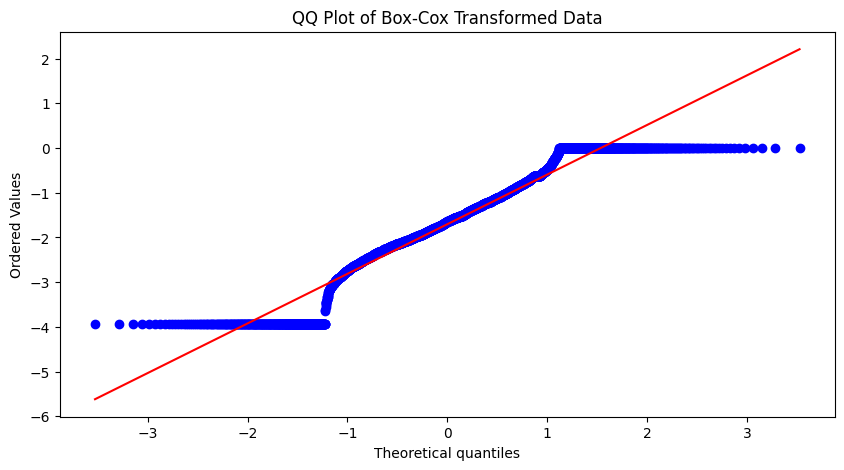


Shapiro-Wilk Test after Box-Cox Transformation:
W=0.9426761675592389, p-value=4.803712342448078e-34

Kolmogorov-Smirnov Test after Box-Cox Transformation:
KS Statistic=0.5693936841791759, p-value=0.0


In [72]:
#Reassessment after applying transformations

# Histogram and QQ plot for box cox-transformed data
plt.figure(figsize=(10, 5))
plt.hist(cust_bc, bins=30, color='red',edgecolor='black')
plt.title('Histogram of Box-Cox Transformed Data')
plt.show()
print()

cust_bc_flatten = cust_bc.flatten()
plt.figure(figsize=(10,5))
stats.probplot(cust_bc_flatten, dist="norm", plot=plt)
plt.title('QQ Plot of Box-Cox Transformed Data')
plt.show()
print()

# Shapiro-Wilk test for box cox-transformed data
shapiro_log_test = shapiro(cust_bc)
print(f'Shapiro-Wilk Test after Box-Cox Transformation:')
print(f'W={shapiro_log_test[0]}, p-value={shapiro_log_test[1]}')
print()

# Kolmogorov-Smirnov test for box cox-transformed data
ks_log_test = kstest(cust_bc, 'norm')
print(f'Kolmogorov-Smirnov Test after Box-Cox Transformation:')
print(f'KS Statistic={ks_log_test[0]}, p-value={ks_log_test[1]}')

# Inference:

-->Firstly, from the tests, initially, it is
observed that the dataset was highly unnormalized;

-->Secondly, after the transformations were applied, it is
observed that the dataset was normalized a bit, and from the tests and
the test statistic values W and p-values, it is clear that,
they were made to follow normal distribution.